# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [61]:
# Imports and installs
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.types import DateType


## Step 1: Project Scope and Data Gathering <a name="step1"></a>

### Scope <a name="scope"></a>

### Data Description <a name="data_desc"></a>

### Step 1: Scope the Project and Gather Data

#### Scope 
* For the Data Engineering capstone project I have created a data pipeline which creates a database containing information about immigration into the US. This database can then be queried for the corresponding information and is hosted on Amazon Redshift. The orchestration/implementation is then done using Apache Airflow. The scope of this project is limited to the datsets listed in the below section. The primary focus is on the type of visas being issued and the profiles associated with the data at an aggregation level across features such as visa type, gender, port of entry,etc.

#### Describe and Gather Data 
* I94 Immigration Data: This data comes from the US National Tourism and Trade Office found [here](https://travel.trade.gov/research/reports/i94/historical/2016.html). Each report contains international visitor arrival statistics by world regions and select countries (including top 20), type of visa, mode of transportation, age groups, states visited (first intended address only), and the top ports of entry (for select countries).
* World Temperature Data: This dataset came from Kaggle found here [here](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).
* U.S. City Demographic Data: This dataset contains information about the demographics of all US cities and census-designated places with a population greater or equal to 65,000. Dataset comes from OpenSoft found here [here](https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/).
* Airport Code Table: This is a simple table of airport codes and corresponding cities. The airport codes may refer to either IATA airport code, a three-letter code which is used in passenger reservation, ticketing and baggage-handling systems, or the ICAO airport code which is a four letter code used by ATC systems and for airports that do not have an IATA airport code (from wikipedia). It comes from [here](https://datahub.io/core/airport-codes#data).

#### I-94 Immigration Data from "sas_data" parquet data file


In [62]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
config("spark.jars.repositories", "https://repos.spark-packages.org/").\
config("spark.jars.packages", "saurfang:spark-sas7bdat:2.0.0-s_2.11").\
enableHiveSupport().getOrCreate()

In [63]:
df_imm = spark.read.parquet("sas_data")
df_imm.limit(10).toPandas()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,5748517.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,CA,20582.0,...,None,M,1976.0,10292016,F,None,QF,9.495387e+10,00011,B1
1,5748518.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,NV,20591.0,...,None,M,1984.0,10292016,F,None,VA,9.495562e+10,00007,B1
2,5748519.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20582.0,...,None,M,1987.0,10292016,M,None,DL,9.495641e+10,00040,B1
3,5748520.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20588.0,...,None,M,1987.0,10292016,F,None,DL,9.495645e+10,00040,B1
4,5748521.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20588.0,...,None,M,1988.0,10292016,M,None,DL,9.495639e+10,00040,B1
5,5748522.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20579.0,...,None,M,1959.0,10292016,M,None,NZ,9.498180e+10,00010,B2
6,5748523.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20586.0,...,None,M,1950.0,10292016,F,None,NZ,9.497969e+10,00010,B2
7,5748524.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20586.0,...,None,M,1975.0,10292016,F,None,NZ,9.497975e+10,00010,B2
8,5748525.0,2016.0,4.0,245.0,464.0,HOU,20574.0,1.0,FL,20581.0,...,None,M,1989.0,10292016,M,None,NZ,9.497325e+10,00028,B2
9,5748526.0,2016.0,4.0,245.0,464.0,LOS,20574.0,1.0,CA,20581.0,...,None,M,1990.0,10292016,F,None,NZ,9.501355e+10,00002,B2


In [64]:
print(df_imm.count())

3096313


#### U.S. Cities Demographics Data

In [65]:
df_city = pd.read_csv('us-cities-demographics.csv',sep=';')
df_city.head(10)

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402
5,Peoria,Illinois,33.1,56229.0,62432.0,118661,6634.0,7517.0,2.40,IL,American Indian and Alaska Native,1343
6,Avondale,Arizona,29.1,38712.0,41971.0,80683,4815.0,8355.0,3.18,AZ,Black or African-American,11592
7,West Covina,California,39.8,51629.0,56860.0,108489,3800.0,37038.0,3.56,CA,Asian,32716
8,O'Fallon,Missouri,36.0,41762.0,43270.0,85032,5783.0,3269.0,2.77,MO,Hispanic or Latino,2583
9,High Point,North Carolina,35.5,51751.0,58077.0,109828,5204.0,16315.0,2.65,NC,Asian,11060


In [66]:
print(df_city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 12 columns):
City                      2891 non-null object
State                     2891 non-null object
Median Age                2891 non-null float64
Male Population           2888 non-null float64
Female Population         2888 non-null float64
Total Population          2891 non-null int64
Number of Veterans        2878 non-null float64
Foreign-born              2878 non-null float64
Average Household Size    2875 non-null float64
State Code                2891 non-null object
Race                      2891 non-null object
Count                     2891 non-null int64
dtypes: float64(6), int64(2), object(4)
memory usage: 271.1+ KB
None


#### Airport Code Data

In [67]:
df_airport = pd.read_csv('airport-codes_csv.csv')
df_airport.head(10)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
5,00AS,small_airport,Fulton Airport,1100.0,NaN,US,US-OK,Alex,00AS,NaN,00AS,"-97.8180194, 34.9428028"
6,00AZ,small_airport,Cordes Airport,3810.0,NaN,US,US-AZ,Cordes,00AZ,NaN,00AZ,"-112.16500091552734, 34.305599212646484"
7,00CA,small_airport,Goldstone /Gts/ Airport,3038.0,NaN,US,US-CA,Barstow,00CA,NaN,00CA,"-116.888000488, 35.350498199499995"
8,00CL,small_airport,Williams Ag Airport,87.0,NaN,US,US-CA,Biggs,00CL,NaN,00CL,"-121.763427, 39.427188"
9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,NaN,US,US-CA,Pine Valley,00CN,NaN,00CN,"-116.4597417, 32.7273736"


In [68]:
print(df_airport.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55075 entries, 0 to 55074
Data columns (total 12 columns):
ident           55075 non-null object
type            55075 non-null object
name            55075 non-null object
elevation_ft    48069 non-null float64
continent       27356 non-null object
iso_country     54828 non-null object
iso_region      55075 non-null object
municipality    49399 non-null object
gps_code        41030 non-null object
iata_code       9189 non-null object
local_code      28686 non-null object
coordinates     55075 non-null object
dtypes: float64(1), object(11)
memory usage: 5.0+ MB
None


#### World Temperature Data

In [69]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df_temp.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [70]:
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB
None


### Step 2: Explore and Assess the Data
#### Data Prep Step
##### Process SAS Program file and explore the data


In [71]:
# Function to parse the SAS program files containing data for various tables

def sas_file_parser(sas_source_file, value, columns):
    """Parses SAS Program file to return value as pandas dataframe
    Args:
        sas_source_file (str): SAS source code file.
        value (str): sas value to extract.
        columns (list): list of 2 containing column names.
    Return:
        None
    """
    file_string = ''
    
    with open(sas_source_file) as f:
        file_string = f.read()
    
    file_string = file_string[file_string.index(value):]
    file_string = file_string[:file_string.index(';')]
    
    line_list = file_string.split('\n')[1:]
    codes = []
    values = []
    
    for line in line_list:
        
        if '=' in line:
            code, val = line.split('=')
            code = code.strip()
            val = val.strip()

            if code[0] == "'":
                code = code[1:-1]

            if val[0] == "'":
                val = val[1:-1]

            codes.append(code)
            values.append(val)
        
            
    return pd.DataFrame(list(zip(codes,values)), columns=columns)


In [72]:
i94cit_res = sas_file_parser('I94_SAS_Labels_Descriptions.SAS', 'i94cntyl', ['code', 'country'])

In [73]:
i94cit_res.head()

,code,country
0,582,"MEXICO Air Sea, and Not Reported (I-94, no lan..."
1,236,AFGHANISTAN
2,101,ALBANIA
3,316,ALGERIA
4,102,ANDORRA


In [74]:
i94port = sas_file_parser('I94_SAS_Labels_Descriptions.SAS', 'i94prtl', ['code', 'port'])
i94port.head()

,code,port
0,ALC,"ALCAN, AK"
1,ANC,"ANCHORAGE, AK"
2,BAR,"BAKER AAF - BAKER ISLAND, AK"
3,DAC,"DALTONS CACHE, AK"
4,PIZ,"DEW STATION PT LAY DEW, AK"


In [75]:
i94mode = sas_file_parser('I94_SAS_Labels_Descriptions.SAS', 'i94model', ['code', 'mode'])
i94mode.head()

,code,mode
0,1,Air
1,2,Sea
2,3,Land
3,9,Not reported


In [76]:
i94addr = sas_file_parser('I94_SAS_Labels_Descriptions.SAS', 'i94addrl', ['code', 'addr'])
i94addr.head()

,code,addr
0,AL,ALABAMA
1,AK,ALASKA
2,AZ,ARIZONA
3,AR,ARKANSAS
4,CA,CALIFORNIA


In [77]:
i94visa = sas_file_parser('I94_SAS_Labels_Descriptions.SAS', 'I94VISA', ['code', 'type'])
i94visa.head()

,code,type
0,1,Business
1,2,Pleasure
2,3,Student


#### Process Immigration Dataset

In [78]:
df_imm.limit(10).toPandas()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,5748517.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,CA,20582.0,...,None,M,1976.0,10292016,F,None,QF,9.495387e+10,00011,B1
1,5748518.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,NV,20591.0,...,None,M,1984.0,10292016,F,None,VA,9.495562e+10,00007,B1
2,5748519.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20582.0,...,None,M,1987.0,10292016,M,None,DL,9.495641e+10,00040,B1
3,5748520.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20588.0,...,None,M,1987.0,10292016,F,None,DL,9.495645e+10,00040,B1
4,5748521.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20588.0,...,None,M,1988.0,10292016,M,None,DL,9.495639e+10,00040,B1
5,5748522.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20579.0,...,None,M,1959.0,10292016,M,None,NZ,9.498180e+10,00010,B2
6,5748523.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20586.0,...,None,M,1950.0,10292016,F,None,NZ,9.497969e+10,00010,B2
7,5748524.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20586.0,...,None,M,1975.0,10292016,F,None,NZ,9.497975e+10,00010,B2
8,5748525.0,2016.0,4.0,245.0,464.0,HOU,20574.0,1.0,FL,20581.0,...,None,M,1989.0,10292016,M,None,NZ,9.497325e+10,00028,B2
9,5748526.0,2016.0,4.0,245.0,464.0,LOS,20574.0,1.0,CA,20581.0,...,None,M,1990.0,10292016,F,None,NZ,9.501355e+10,00002,B2


### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

<div style="text-align: left">The data model in star schema consists of tables immigration, us_cities_demographics, airport_codes, world_temperature, i94cit_res, i94port, i94mode, i94addr, i94visa</div>

* In immigration table i94mon column is used as a DISTKEY AND i94year as SORTKEY
* The following tables are distributed across all nodes(DISTSTYLE ALL): us_cities_demographics, i94cit_res, i94port, i94mode, i94addr, i94visa

![Schema](Schema.PNG)

#### 3.2 Mapping Out Data Pipelines

<b>Building the Operators</b>

We need to build four different operators that will stage the data, transform the data, and run checks on data quality. All of the operators and task instances will run SQL statements against the Redshift database. The objective is to use parameters to build flexible, reusable, and configurable operators that can later be applied to many kinds of data pipelines with Redshift and with other databases.

<b>Dummy Operators</b>

The start_operator,load_operator and end_operator are dummy operators which act as placeholders to signal the start of the ETL process, the transition point to data load after table creation and the end of the process.

<b>CopyToRedshiftOperator</b>

This operator is used to load the csv and/or parquet files from S3 to the Redshift table destination. In this case the tables are `immigration`,`us_cities_demographics`,`airport_codes`  and `world_temperature`

<b>SASToRedshiftOperator</b>

This operator is used to parse a sas source file from the S3 location and extract codes, values to load data into respective target Redshift table destinations.In this case the tables are `i94cit_res`,`i94port`,`i94mode`,`i94addr` and `i94visa`

<b>Data Quality Operator</b>

The final operator to create is the data quality operator, which is used to run checks on the data itself. The operator's main functionality is to receive one or more SQL based test cases along with the expected results and execute the tests. For each the test, the test result and expected result needs to be checked and if there is no match, the operator should raise an exception and the task should retry and fail eventually.


### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

The pipeline is run using airflow to create the data model. In this case airflow was run using docker on a windows machine as well as using the Udacity project workspace for airflow.

<img src="DAG_Graphview.png" width=1000 height=1000 />

<img src="DAG_Treeview.PNG" width=1000 height=1000 />

#### Check Results of the ETL process

Check if all tables have been created on target database and loaded with data

In [79]:
import psycopg2
redshift_endpoint = "redshift-cluster-1.cinxu7jtjfum.us-west-2.redshift.amazonaws.com"
redshift_user = "awsuser"
redshift_pass = "Admin123"
port = 5439
dbname = "dev"

In [80]:
from sqlalchemy import create_engine
from sqlalchemy import text
engine_string = "postgresql+psycopg2://%s:%s@%s:%d/%s" \
% (redshift_user, redshift_pass, redshift_endpoint, port, dbname)
engine = create_engine(engine_string)

In [81]:


sql = engine.execute("""
SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' AND TABLE_CATALOG='dev'
""")
tables = pd.DataFrame([{**row} for row in sql]).tail(9)
tables


,table_name
103,airport_codes
104,i94mode
105,us_cities_demographics
106,world_temperature
107,immigration
108,i94port
109,i94cit_res
110,i94visa
111,i94addr


In [82]:
sql = engine.execute("""select * from immigration limit 5;""")
pd.DataFrame([{**row} for row in sql])

,admnum,airline,arrdate,biryear,cicid,count,depdate,dtaddto,dtadfile,entdepa,...,i94mon,i94port,i94res,i94visa,i94yr,insnum,matflag,occup,visapost,visatype
0,1.897628e+09,None,20573.0,1979.0,6.0,1.0,NaN,10282016,None,T,...,4.0,XXX,692.0,2.0,2016.0,None,None,None,None,B2
1,5.923369e+10,OZ,20569.0,1954.0,4742196.0,1.0,20580.0,07232016,20160425,G,...,4.0,LOS,276.0,2.0,2016.0,None,M,None,None,WT
2,3.736796e+09,None,20551.0,1991.0,7.0,1.0,NaN,D/S,20130811,G,...,4.0,ATL,276.0,3.0,2016.0,None,None,None,SEO,F1
3,5.923393e+10,OZ,20569.0,1962.0,4742197.0,1.0,20580.0,07232016,20160425,G,...,4.0,LOS,276.0,2.0,2016.0,None,M,None,None,WT
4,6.666432e+08,OS,20545.0,1961.0,15.0,1.0,20691.0,09302016,20160401,T,...,4.0,WAS,101.0,2.0,2016.0,None,M,None,None,B2


In [83]:
sql = engine.execute("""select * from airport_codes limit 5;""")
pd.DataFrame([{**row} for row in sql])

,continent,coordinates,elevation_ft,gps_code,iata_code,ident,iso_country,iso_region,local_code,municipality,name,type
0,NA,"-74.93360137939453, 40.07080078125",11.0,00A,,00A,US,US-PA,00A,Bensalem,Total Rf Heliport,heliport
1,NA,"-151.695999146, 59.94919968",450.0,00AK,,00AK,US,US-AK,00AK,Anchor Point,Lowell Field,small_airport
2,NA,"-91.254898, 35.6087",237.0,,,00AR,US,US-AR,,Newport,Newport Hospital & Clinic Heliport,closed
3,NA,"-112.16500091552734, 34.305599212646484",3810.0,00AZ,,00AZ,US,US-AZ,00AZ,Cordes,Cordes Airport,small_airport
4,NA,"-121.763427, 39.427188",87.0,00CL,,00CL,US,US-CA,00CL,Biggs,Williams Ag Airport,small_airport


In [84]:
sql = engine.execute("""select * from us_cities_demographics limit 5;""")
pd.DataFrame([{**row} for row in sql])

,average_household_size,city,count,female_population,foreign_born,male_population,median_age,number_of_veterans,race,state,state_code,total_population
0,2.60,Silver Spring,25924,41862,30908,40601,33.8,1562,Hispanic or Latino,Maryland,MD,82463
1,2.39,Quincy,58723,49500,32935,44129,41.0,4147,White,Massachusetts,MA,93629
2,2.58,Hoover,4759,46799,8229,38040,38.5,4819,Asian,Alabama,AL,84839
3,3.18,Rancho Cucamonga,24437,87105,33878,88127,34.5,5821,Black or African-American,California,CA,175232
4,2.73,Newark,76402,143873,86253,138040,34.6,5829,White,New Jersey,NJ,281913


In [85]:
sql = engine.execute("""select * from i94visa limit 5;""")
pd.DataFrame([{**row} for row in sql])

,code,type
0,1.0,Business
1,2.0,Pleasure
2,3.0,Student


In [86]:
sql = engine.execute("""select * from i94addr limit 5;""")
pd.DataFrame([{**row} for row in sql])

,addr,code
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA


In [87]:
sql = engine.execute("""select * from i94cit_res limit 5;""")
pd.DataFrame([{**row} for row in sql])

,code,country
0,582.0,"MEXICO Air Sea, and Not Reported (I-94, no lan..."
1,236.0,AFGHANISTAN
2,101.0,ALBANIA
3,316.0,ALGERIA
4,102.0,ANDORRA


In [88]:
sql = engine.execute("""select * from i94mode limit 5;""")
pd.DataFrame([{**row} for row in sql])

,code,mode
0,1.0,Air
1,2.0,Sea
2,3.0,Land
3,9.0,Not reported


In [89]:
sql = engine.execute("""select * from i94port limit 5;""")
pd.DataFrame([{**row} for row in sql])

,code,port
0,ALC,"ALCAN, AK"
1,ANC,"ANCHORAGE, AK"
2,BAR,"BAKER AAF - BAKER ISLAND, AK"
3,DAC,"DALTONS CACHE, AK"
4,PIZ,"DEW STATION PT LAY DEW, AK"


In [90]:
sql = engine.execute("""select * from world_temperature limit 5;""")
pd.DataFrame([{**row} for row in sql])

,averagetemperature,averagetemperatureuncertainty,city,country,dt,latitude,longitude
0,NaN,NaN,Århus,Denmark,1743-12-01,57.05N,10.33E
1,NaN,NaN,Århus,Denmark,1744-02-01,57.05N,10.33E
2,5.788,3.624,Århus,Denmark,1744-04-01,57.05N,10.33E
3,14.051,1.347,Århus,Denmark,1744-06-01,57.05N,10.33E
4,NaN,NaN,Århus,Denmark,1744-08-01,57.05N,10.33E


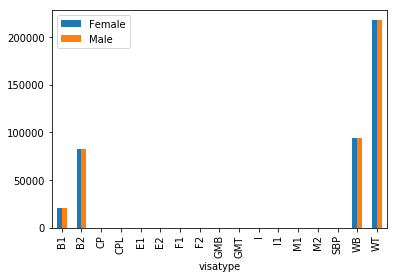

In [93]:
sql = engine.execute("""
SELECT 
    im.gender, 
    im.visatype,
    count(im.cicid) 
FROM immigration as im 
GROUP BY im.gender, im.visatype
""")

df_query = pd.DataFrame([{**row} for row in sql])

df = df_query.set_index(['visatype', 'gender']).unstack()[[('count', 'Male'),('count', 'Female')]]
df.columns=['Female', 'Male']
df.plot(kind='bar');


### Step 5: Complete Project Write Up
#### Clearly state the rationale for the choice of tools and technologies for the project.

1. Apache Airflow: Airflow allows for easy automation and monitoring of etl pipelines in order to keep an analytics database up to date. It also provides helpful graphical visibility into the various steps in the process.
2. Amazon Redshift: Redshift is a massively parallel distributed data source that is ideal for storing data required for analytics usage.

#### Propose how often the data should be updated and why.
  
Data should be updated monthly as the immigration dataset is at a monthly level

#### Write a description of how you would approach the problem differently under the following scenarios:
* **The data was increased by 100x:** If the data increases by 100x then I would look towards using EMR and spark to handle it.
* **The data populates a dashboard that must be updated on a daily basis by 7am every day.** The schedule of the DAG would have to be updated correspondingly to staisfy this daily requirement of having up to date data for the dashboard.
* **The database needed to be accessed by 100+ people.** Since the data is already on a massively parallel data warehouse such as Redshift, I would look into using role-based access control (RBAC) as per AWS's recent [announcement](https://aws.amazon.com/blogs/big-data/simplify-management-of-database-privileges-in-amazon-redshift-using-role-based-access-control/) to control end user access to data at a broad or granular level based on their job role/permission rights and level of data sensitivity.